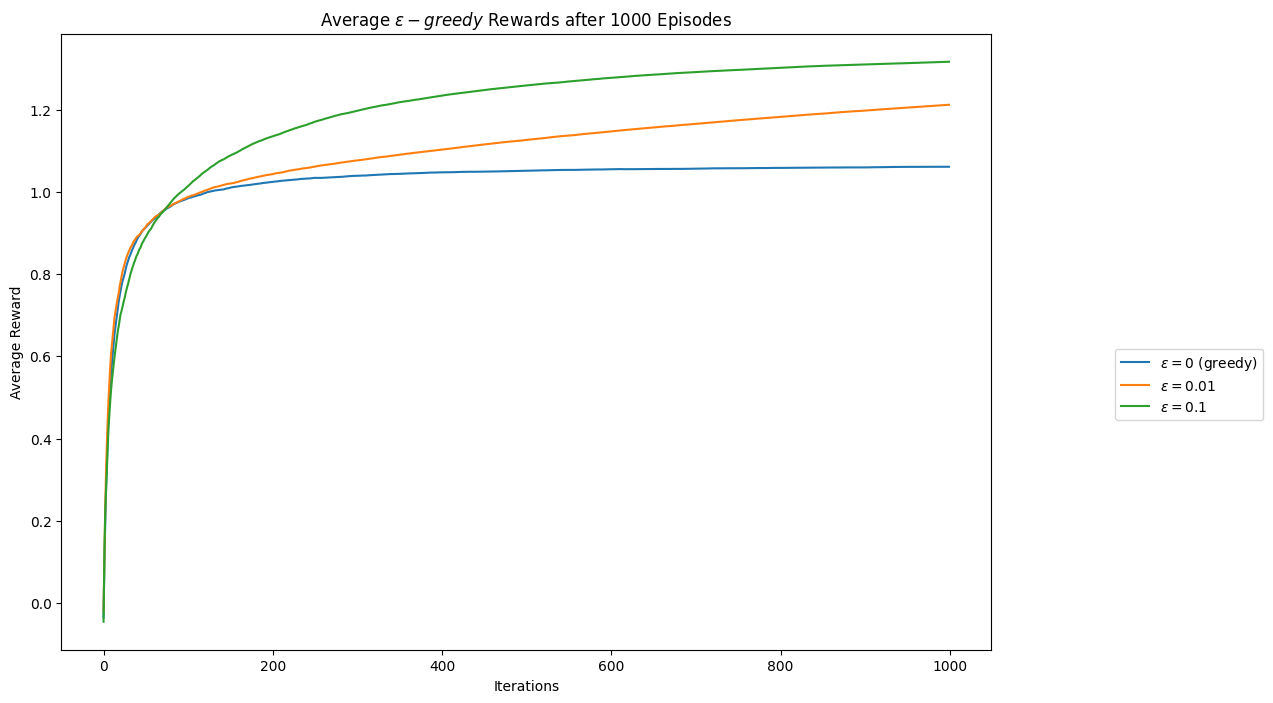

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''

    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)

        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
    def pull(self):
      p = np.random.rand()
      if self.eps == 0 and self.n == 0:
          a = np.random.choice(self.k)
      elif p < self.eps:
          # Randomly select an action
          a = np.random.choice(self.k)
      else:
          # Take greedy action
          a = np.argmax(self.k_reward)

      reward = np.random.normal(self.mu[a], 1)

      # Update counts
      self.n += 1
      self.k_n[a] += 1

      # Update total
      self.mean_reward = self.mean_reward + (
          reward - self.mean_reward) / self.n

      # Update results for a_k
      self.k_reward[a] = self.k_reward[a] + (
          reward - self.k_reward[a]) / self.k_n[a]

    #  # Step 1: Generate a random number

    # # Step 2: Choose an action

    # # Step 3: Generate a reward for the chosen action

    # # Step 4: Update counts

    # # Step 5: Update total mean reward

    # # Step 6: Update estimated reward for the chosen action

    # return reward

    # INSERT CODE HERE


    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()

    # Update long-term averages
    # INSERT CODE HERE
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)
    + " Episodes")
plt.show()